# Data Processing in Python - Final Project <br>
## Vaccination in CR in terms of data <br>
### Karlíček Ondřej, Krejcar Vilém

# TBD/NÁPADY
 - propojit ty datasety a udělat třeba efektivitu/vytíženost jednotlivejch očkovacích míst/krajů
 - podívat se kde jsou ty očkovací místa ne tolik obsazený a proč
 - podívat se na data a proč je objem vakcinace cca stejnej napíč věkovejma skupinama když se očkování dělá postupně
     - nejspíš protože chronicky nemocní apod., idk
 - udělat jinej náhled na zpracování datasetu po řádcích (nice-to-have)
 - možná udělat nějakej scraping, abychom zahrnuli více věcí z přednášky
     - např. scrapnout z Wiki počet obyvatel v danym kraji a udělat z toho procento kolik už lidí z kraje je naočkováno
 - mapování očkování po týdnech, časových úsecích a udělat z toho nějakej graf
     - např. jak se vyvijí objem očkovaných lidí napříč časem a kde to roste nejvíce apod.
 - podívat se na grafy ze Seaborn, jsou tam fakt hezký

In [1]:
#importing packages needed for the work with data

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import datetime

At first, let's explore dataset with basic information about vaccination in CR:

In [2]:
vaccination = pd.read_csv('https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/ockovani.csv')
vaccination.keys()

Index(['datum', 'vakcina', 'kraj_nuts_kod', 'kraj_nazev', 'vekova_skupina',
       'prvnich_davek', 'druhych_davek', 'celkem_davek'],
      dtype='object')

In [3]:
vaccination.head(5)

,datum,vakcina,kraj_nuts_kod,kraj_nazev,vekova_skupina,prvnich_davek,druhych_davek,celkem_davek
0,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,18-24,48,0,48
1,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,25-29,109,0,109
2,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,30-34,102,0,102
3,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,35-39,111,0,111
4,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,40-44,172,0,172


In [4]:
vaccination['datum']

0        2020-12-27
1        2020-12-27
2        2020-12-27
3        2020-12-27
4        2020-12-27
            ...    
49141    2021-05-15
49142    2021-05-15
49143    2021-05-15
49144    2021-05-15
49145    2021-05-15
Name: datum, Length: 49146, dtype: object

In [5]:
vaccine_series = vaccination.groupby("vakcina")['celkem_davek'].sum()
vaccine_series

vakcina
COVID-19 Vaccine Janssen      22576
COVID-19 Vaccine Moderna     391354
Comirnaty                   3262254
VAXZEVRIA                    433987
Name: celkem_davek, dtype: int64

In [6]:
vaccine_series[0]

22576

Here we can see what the vaccine distribution in CR looks like. For better visualization, we will use a Pie Chart which will give better understanding of numbers. We also renamed the vaccines for people to understand it - they are presented not by their name, but by the name of company which makes them.

## Important info



Personally, I have a black theme of Jupyter, thus it is convinient for me to change the labels' colors - it can be changed by simply calling set_theme function - the values are either black/white depending on your theme of Jupyter.

In [7]:
text_color = ""
inner_circle_color = ""
def my_theme(color):
    global text_color
    global inner_circle_color
    if color == "black":
        text_color = "white"
        inner_circle_color = "black"
    elif color == "white":
        text_color = "black"
        inner_circle_color = "white"
    else: 
        raise ValueError("Please choose either black or white color")
    return f"Theme was set to {color}."

# my_theme("black")
my_theme("white")

'Theme was set to white.'

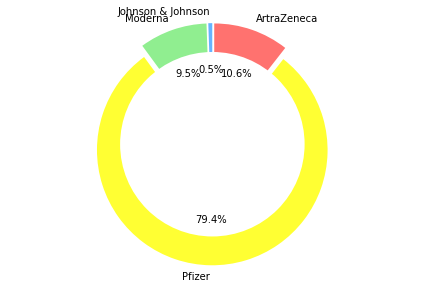

In [8]:
labels = ["Johnson & Johnson", "Moderna", "Pfizer", "ArtraZeneca"]
sizes = [vaccine_series[0], vaccine_series[1], vaccine_series[2], vaccine_series[3]]
#colors
colors = ["#66b3ff", "#90EE90", "#FFFF33", "#ff726f"]
#explsion
explode = (0.05, 0.05, 0.05, 0.05)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct="%1.1f%%", startangle=90, textprops={"color":text_color}, explode = explode)
# we will make a circle
centre_circle = plt.Circle((0,0),0.8,fc=inner_circle_color)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# equal aspect ratio ensures that pie is drawn as a circle
ax1.axis("equal")
# in order to remove the unnecessary data
plt.tight_layout()

Almost a 80% of the doses used in CR are produced by Pfizer, follower by 10% of total vaccines by Moderna and AstraZeneca and small portion of J&J's vaccine forms 0.5%.

In [9]:
vaccination.groupby("vekova_skupina")['prvnich_davek'].sum()

vekova_skupina
0-17            1600
18-24          36367
25-29          49414
30-34          59836
35-39          82254
40-44         124720
45-49         199557
50-54         268505
55-59         321305
60-64         345712
65-69         430253
70-74         456611
75-79         318657
80+           333910
nezařazeno        31
Name: prvnich_davek, dtype: int64

This series shows number of people vaccinated at least with one dose according to the age groups

In [10]:
spotreba_dle_om = pd.DataFrame(pd.read_csv("https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/ockovani-spotreba.csv"))
print(spotreba_dle_om.shape)
spotreba_dle_om.head()


(17349, 11)


,datum,ockovaci_misto_id,ockovaci_misto_nazev,kraj_nuts_kod,kraj_nazev,ockovaci_latka,vyrobce,pouzite_ampulky,znehodnocene_ampulky,pouzite_davky,znehodnocene_davky
0,2020-12-26,0f396137-e1fe-4e67-8291-292e4066376d,FN Brno Výstaviště,CZ064,Jihomoravský kraj,Comirnaty,Pfizer,487,0,2922,0
1,2020-12-26,9295cb5e-e9ae-4858-97ce-5dadaf99ad72,Všeobecná fakultní nemocnice Praha,CZ010,Hlavní město Praha,Comirnaty,Pfizer,195,0,1170,0
2,2020-12-27,6ad1717f-2bac-44e6-b7e9-6582da6b6598,Fakultní Nemocnice Bulovka,CZ010,Hlavní město Praha,Comirnaty,Pfizer,42,0,252,0
3,2020-12-27,b62c5314-15f8-4da2-95f0-0aedd6d11ac2,Nemocnice Na Homolce,CZ010,Hlavní město Praha,Comirnaty,Pfizer,8,0,48,0
4,2020-12-27,77079458-38f2-4bff-b983-7f99a07afdc3,Fakultní nemocnice v Motole,CZ010,Hlavní město Praha,Comirnaty,Pfizer,77,0,462,0


In [11]:
spotreba_dle_om["davka_per_ampulka"] = spotreba_dle_om["pouzite_davky"]/spotreba_dle_om["pouzite_ampulky"]

spotreba_dle_om.groupby("ockovaci_latka")["davka_per_ampulka"].mean()

ockovaci_latka
COVID-19 Vaccine Moderna    10.0
Comirnaty                    6.0
VAXZEVRIA                   10.0
Name: davka_per_ampulka, dtype: float64

We can see that per one ampule, nurses can vaccinate 6 or 10 people depending on the type of the vaccine manufacturer: <br>
    - one ampule of Moderna and AstraZeneca can be split into 10 doses <br>
    - one ampule of Pfizer is usually split into 6 doses <br>

In [12]:
registrace_dle_om = pd.read_csv("https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/ockovani-registrace.csv")
print(registrace_dle_om.shape)
registrace_dle_om.head()

(473721, 10)


,datum,ockovaci_misto_id,ockovaci_misto_nazev,kraj_nuts_kod,kraj_nazev,vekova_skupina,povolani,stat,rezervace,datum_rezervace
0,2021-05-15,481dd978-47d9-46a2-a379-84fc06761772,Vsetínská nemocnice a.s.,CZ072,Zlínský kraj,65-69,Na základě dosaženého věku (aktuálně se mohou ...,CZ,NaN,NaN
1,2021-05-15,ecdde69c-5828-46ca-a973-2ce3cb9ae1b6,Oblastní nemocnice Jičín a.s.,CZ052,Královéhradecký kraj,50-54,Na základě dosaženého věku (aktuálně se mohou ...,CZ,NaN,NaN
2,2021-05-15,85683ce8-5a0e-4733-b5e3-614d9d4ef335,"Nemocnice ve Frýdku-Místku, p.o.",CZ080,Moravskoslezský kraj,45-49,Na základě dosaženého věku (aktuálně se mohou ...,CZ,NaN,NaN
3,2021-05-15,da5422b1-8002-456c-aa95-9a26a5e0e622,Břeclav Dům školství,CZ064,Jihomoravský kraj,45-49,Na základě dosaženého věku (aktuálně se mohou ...,CZ,NaN,NaN
4,2021-05-15,ffddf34a-46dc-48a5-ba76-cf1c35339bf2,Nemocnice Neratovice,CZ020,Středočeský kraj,50-54,Na základě dosaženého věku (aktuálně se mohou ...,CZ,NaN,NaN


In [13]:
registrace_dle_om["datum_rezervace"].isna().value_counts()

False    361136
True     112585
Name: datum_rezervace, dtype: int64

In [29]:
1-(registrace_dle_om["datum_rezervace"].isna().value_counts()[0]/(registrace_dle_om["datum_rezervace"].isna().value_counts()[0] + registrace_dle_om["datum_rezervace"].isna().value_counts()[1]))

0.2376609861078567

Almost 24 per cent of registered people don't have their vaccine reservation. Is it because maybe the reservation system is overflowed.

In [30]:
rezervace = pd.read_csv("https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/ockovani-rezervace.csv")
rezervace

,datum,ockovaci_misto_id,ockovaci_misto_nazev,kraj_nuts_kod,kraj_nazev,volna_kapacita,maximalni_kapacita,kalendar_ockovani
0,2021-06-15,ca2ebe9a-25f5-4386-a47a-1def0c83afa5,"Nemocnice TGM Hodonín, přísp. organizace Dům k...",CZ064,Jihomoravský kraj,0,722,V2
1,2021-06-15,af350a27-6433-421b-8eb6-d22b4088c9be,FN Brno - OČM Velké Meziříčí,CZ063,Kraj Vysočina,0,0,VX
2,2021-06-15,381ef57d-e0e9-4079-a1b9-fd7d476a8aae,Státní zdravotní ústav - budova 11,CZ010,Hlavní město Praha,192,192,V2
3,2021-06-15,492920f2-e2f6-4d29-9b60-b1ec9924d84d,"Nemocnice Kyjov, příspěvková organizace",CZ064,Jihomoravský kraj,0,0,VX
4,2021-06-15,2c11f28c-f95b-4af0-8fd9-d33b104bafb9,Poliklinika GILMEDA Vratimov,CZ080,Moravskoslezský kraj,0,0,VX
...,...,...,...,...,...,...,...,...
112134,2021-01-15,1ddc573d-b6c1-4585-9729-999f36a0a6f1,Avenier a.s. Centrum očkování a cestovní medic...,CZ080,Moravskoslezský kraj,0,0,VX
112135,2021-01-15,28d59069-2d52-40f5-a2a3-75b0daba1c2f,Masarykova nemocnice Rakovník s.r.o.,CZ020,Středočeský kraj,0,0,VX
112136,2021-01-15,8facdb9c-6716-4666-ae00-b58f7ccee441,Oblastní nemocnice Trutnov a.s.,CZ052,Královéhradecký kraj,0,0,VX
112137,2021-01-15,ccccfd3b-1362-49d5-b3b6-b0f71dc6d572,Nemocnice TGM Hodonín,CZ064,Jihomoravský kraj,0,0,VX


In [45]:
print("Number of days without maximum capacity")
rezervace.groupby('ockovaci_misto_nazev')['volna_kapacita'].aggregate(lambda x: sum(x > 0)).sort_values(ascending=False)

Number of days without maximum capacity


ockovaci_misto_nazev
Fakultní nemocnice v Motole                                              56
Fakultní Thomayerova nemocnice                                           39
FN Ostrava - Černá Louka Výstaviště                                      35
Nemocnice Vrchlabí, s.r.o.                                               32
Oblastní nemocnice Mladá Boleslav                                        31
                                                                         ..
SZZ II Brno, p. o., Poliklinika Zahradníkova                              0
Sanatorium Jablunkov, a.s.                                                0
Slatinné lázně Toušeň - Bulovka                                           0
EUC klinika Ostrava                                                       0
Nemocnice Milosrdných bratří, p.o., mobilní očkovací tým Zahradníkova     0
Name: volna_kapacita, Length: 296, dtype: int64